In [1]:

import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

import mccd
from astropy.io import fits

%pylab inline

print(tf.__version__)




runstats and/or skimage could not be imported because not installed
Populating the interactive namespace from numpy and matplotlib
2.4.4


In [2]:

dir_path = '/n05data/tliaudat/new_deepmccd/testing_realistic_sims/outputs/flat_SNR/high_density/L512/shapepipe_run_2022-02-26_11-02-58/mccd_fit_val_runner/output/'




In [3]:

fitted_model = np.load(dir_path + 'fitted_model-2600000.npy', allow_pickle=True)[()]

print(fitted_model[0].keys())
print(fitted_model[1].keys())


dict_keys(['n_comp_loc', 'd_comp_glob', 'upfact'])
dict_keys(['n_ccd', 'obs_pos', 'A_loc', 'A_glob', 'S', 'flux_ref', 'psf_size', 'VT', 'Pi', 'alpha', 'ccd_list'])


In [4]:

val_data = fits.open(dir_path + 'validation_psf-2600000.fits')
val_data[1].columns


ColDefs(
    name = 'PSF_VIGNET_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'PSF_MOM_LIST'; format = '4D'; dim = '(4,)'
    name = 'STAR_MOM_LIST'; format = '4D'; dim = '(4,)'
    name = 'GLOB_POSITION_IMG_LIST'; format = '2D'; dim = '(2,)'
    name = 'VIGNET_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'MASK_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'CCD_ID_LIST'; format = '1D'
)

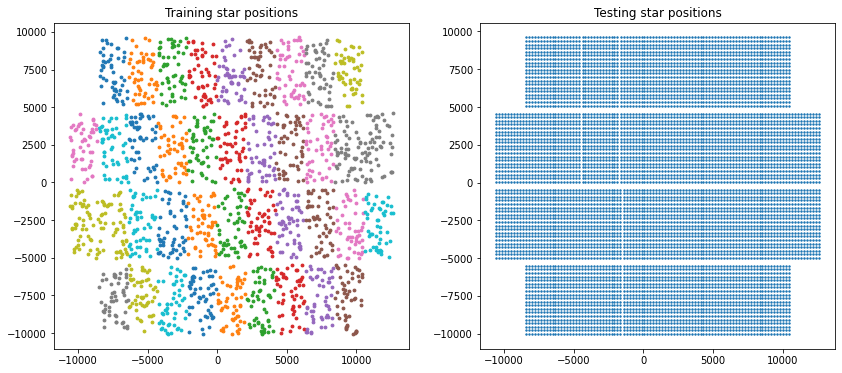

In [5]:

plt.figure(figsize=(14,6))

subplot(121)
for pos in fitted_model[1]['obs_pos']:
    plt.scatter(pos[:,0], pos[:,1], s=8)
gca().title.set_text('Training star positions')

subplot(122)
plt.scatter(val_data[1].data['GLOB_POSITION_IMG_LIST'][:,0], val_data[1].data['GLOB_POSITION_IMG_LIST'][:,1], s=2)
gca().title.set_text('Testing star positions')

plt.show()


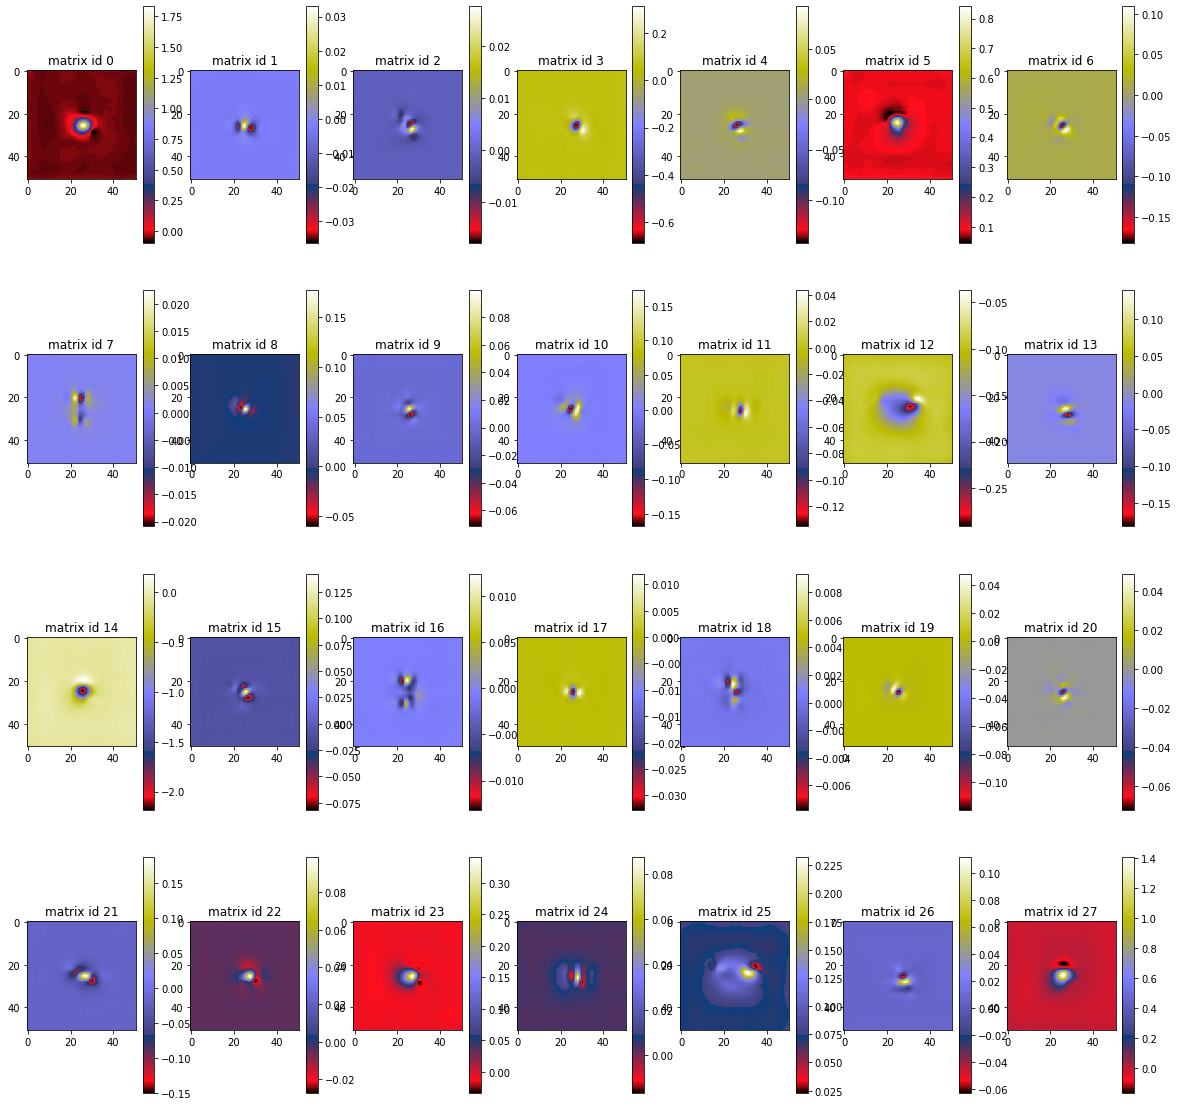

In [6]:

mccd.utils.plot_imgs(mccd.utils.reg_format(fitted_model[1]['S'][-1]), cmap = 'gist_stern', figsize=(20,20))


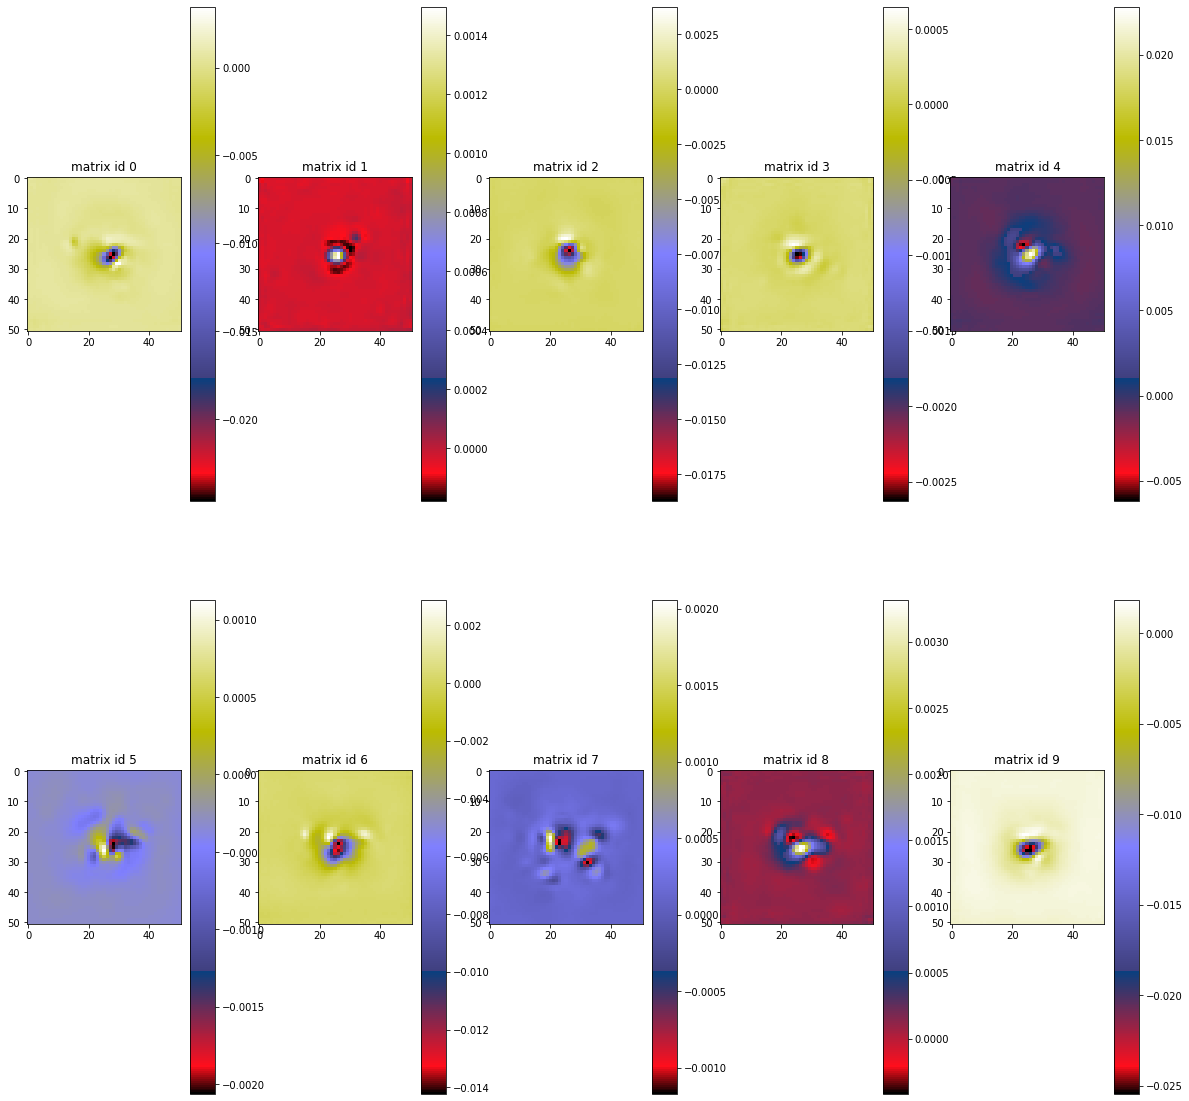

In [8]:


mccd.utils.plot_imgs(mccd.utils.reg_format(fitted_model[1]['S'][1]), cmap = 'gist_stern', figsize=(20,20))




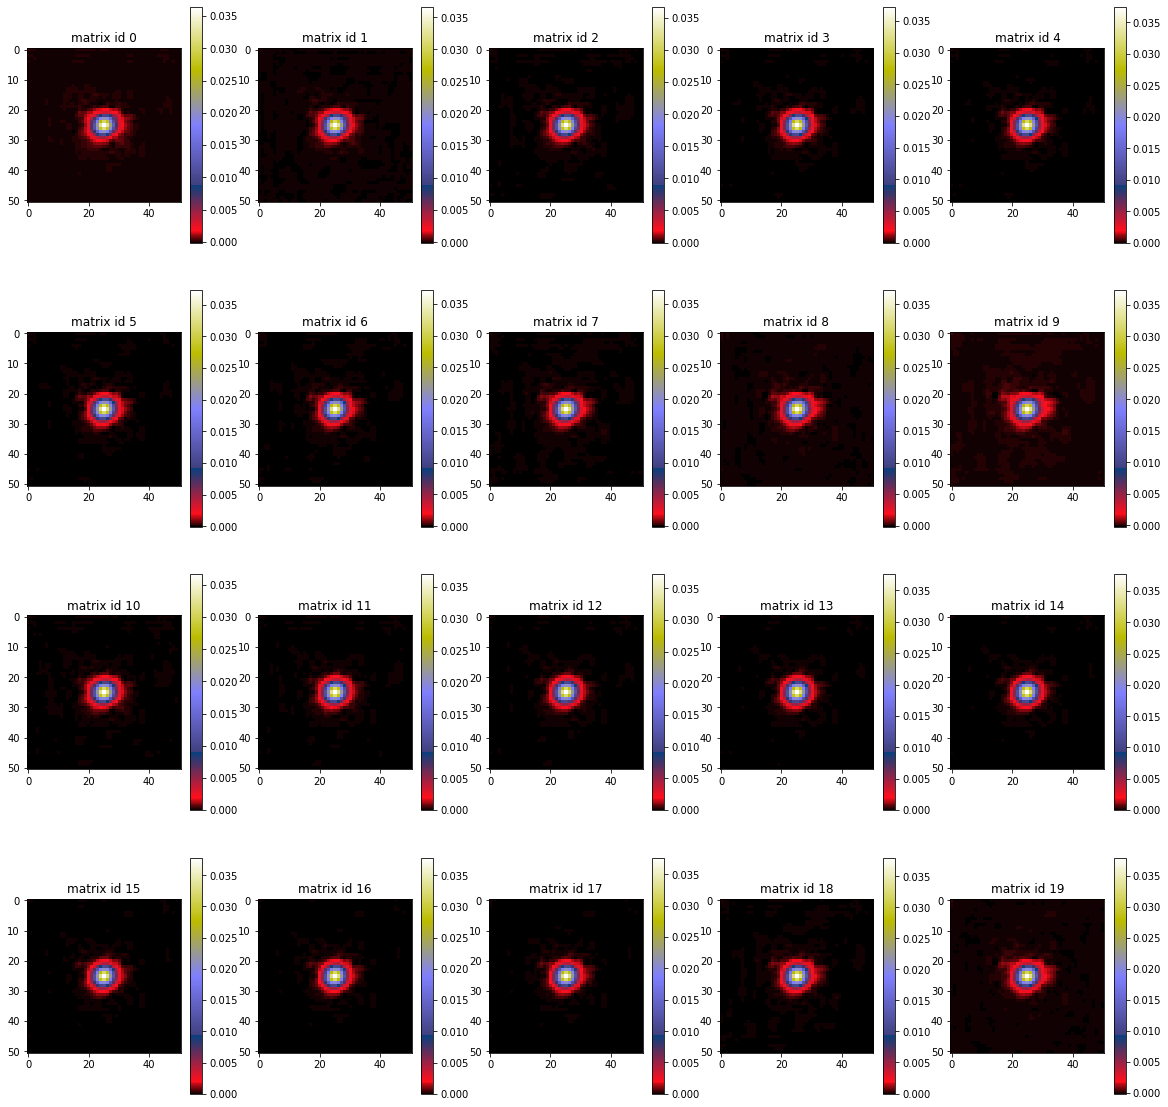

In [10]:

mccd.utils.plot_imgs(val_data[1].data['PSF_VIGNET_LIST'][:20,:,:], cmap = 'gist_stern', figsize=(20,20))



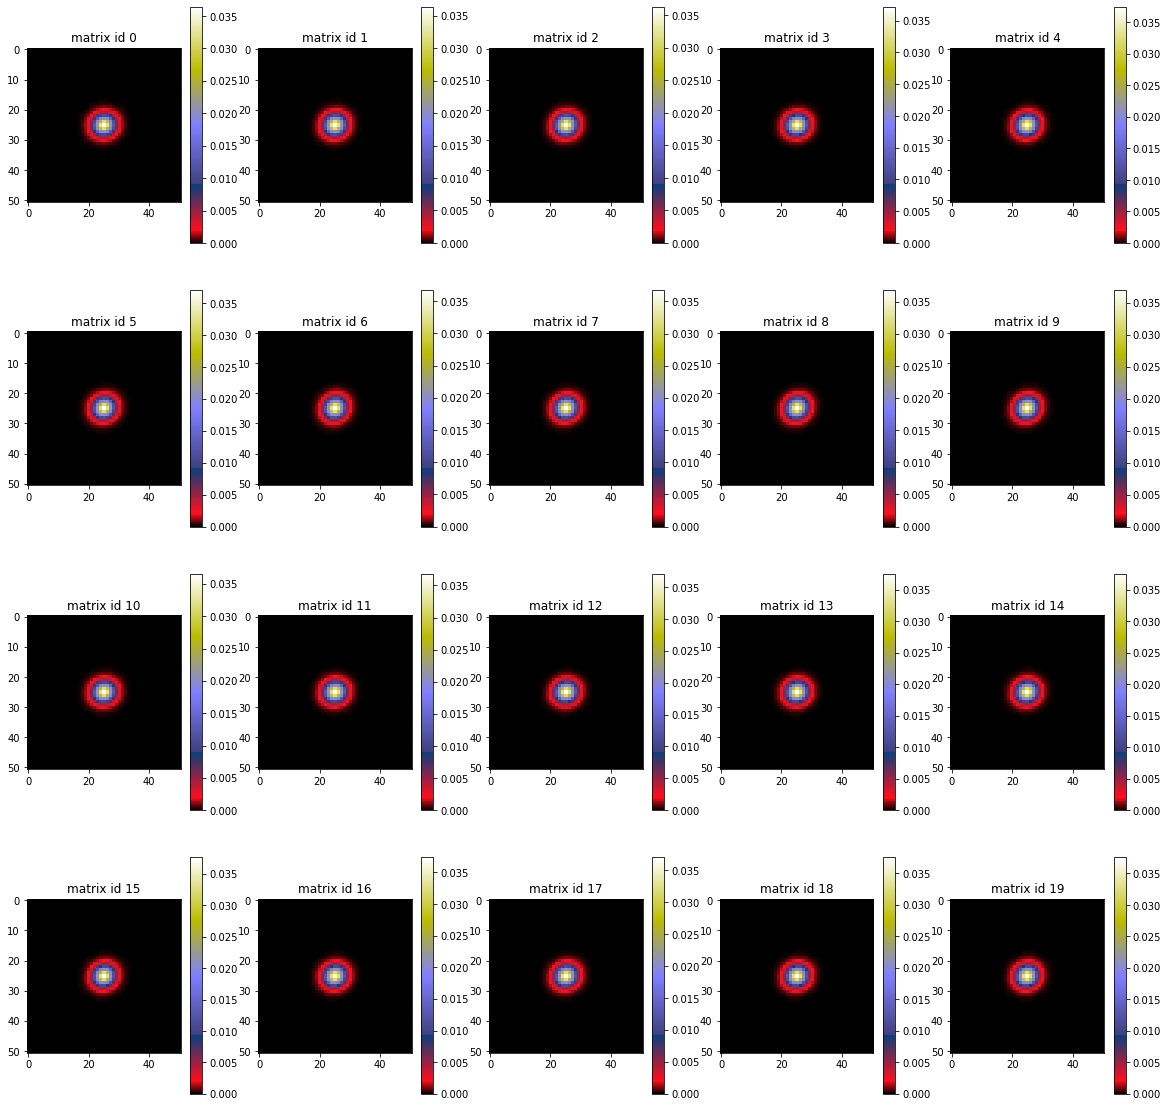

In [11]:

mccd.utils.plot_imgs(val_data[1].data['VIGNET_LIST'][:20,:,:], cmap = 'gist_stern', figsize=(20,20))



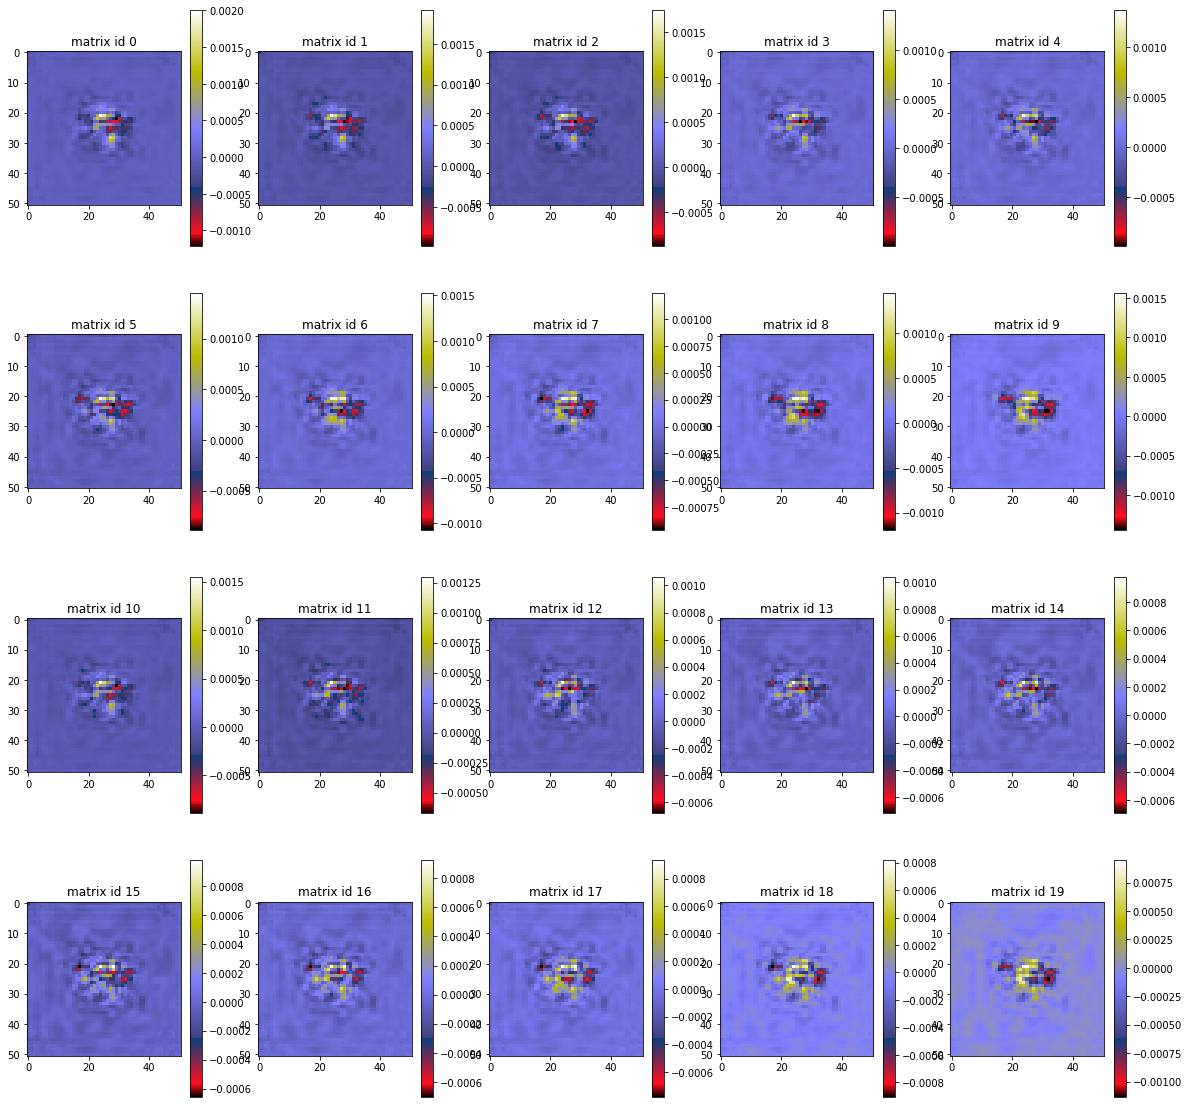

In [12]:

mccd.utils.plot_imgs(
    val_data[1].data['VIGNET_LIST'][:20,:,:] - val_data[1].data['PSF_VIGNET_LIST'][:20,:,:],
    cmap = 'gist_stern',
    figsize=(20,20)
)




## Compare with Aziz's trained model

In [16]:

aziz_path = '/n05data/ayed/outputs/mccd_runs/high_density/shapepipe_run_2021-08-24_21-05-41/mccd_fit_val_runner/output/'


In [15]:
!ls -lah 

total 154M
drwxrwxr-x 2 ayed ayed   85 Aug 24  2021 .
drwxrwxr-x 4 ayed ayed   44 Aug 24  2021 ..
-rw-rw-r-- 1 ayed ayed  11M Aug 24  2021 fitted_model-1234567.npy
-rw-rw-r-- 1 ayed ayed 144M Aug 24  2021 validation_psf-1234567.fits


In [18]:

aziz_model = np.load(aziz_path + 'fitted_model-1234567.npy', allow_pickle=True)[()]


In [19]:

aziz_val_data = fits.open(aziz_path + 'validation_psf-1234567.fits')
aziz_val_data[1].columns


ColDefs(
    name = 'PSF_VIGNET_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'PSF_MOM_LIST'; format = '4D'; dim = '(4,)'
    name = 'STAR_MOM_LIST'; format = '4D'; dim = '(4,)'
    name = 'GLOB_POSITION_IMG_LIST'; format = '2D'; dim = '(2,)'
    name = 'VIGNET_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'MASK_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'CCD_ID_LIST'; format = '1D'
)

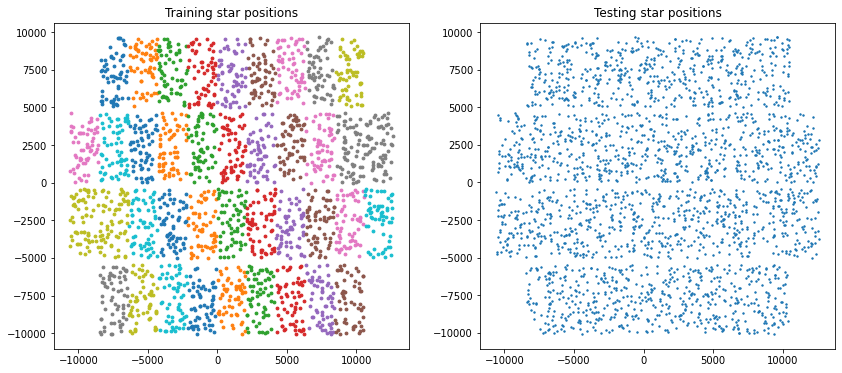

In [20]:


plt.figure(figsize=(14,6))

subplot(121)
for pos in aziz_model[1]['obs_pos']:
    plt.scatter(pos[:,0], pos[:,1], s=8)
gca().title.set_text('Training star positions')

subplot(122)
plt.scatter(aziz_val_data[1].data['GLOB_POSITION_IMG_LIST'][:,0], aziz_val_data[1].data['GLOB_POSITION_IMG_LIST'][:,1], s=2)
gca().title.set_text('Testing star positions')

plt.show()




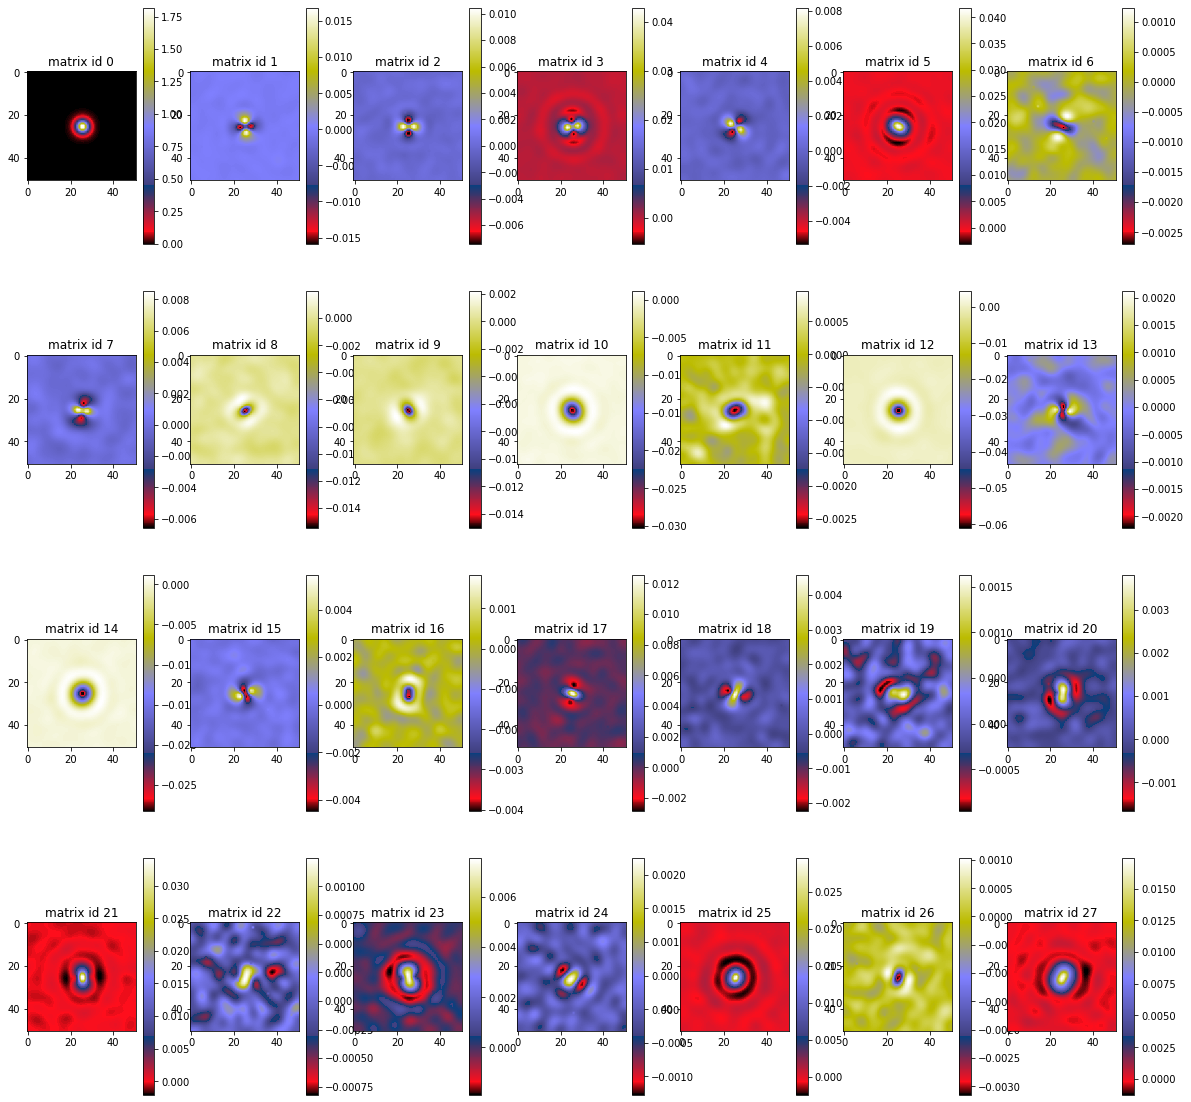

In [21]:

mccd.utils.plot_imgs(mccd.utils.reg_format(aziz_model[1]['S'][-1]), cmap = 'gist_stern', figsize=(20,20))



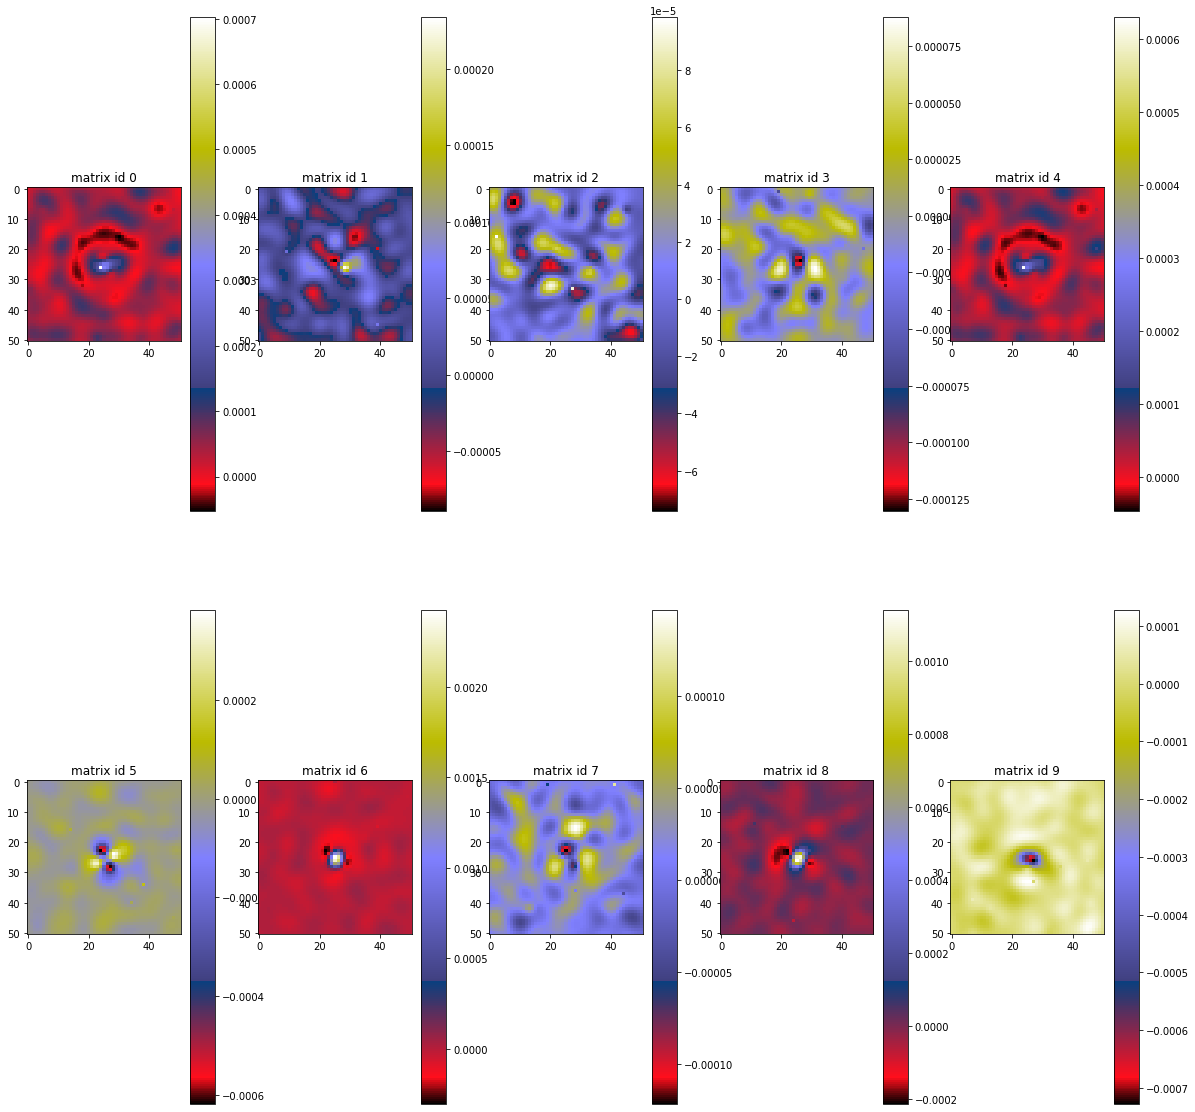

In [22]:
mccd.utils.plot_imgs(mccd.utils.reg_format(aziz_model[1]['S'][1]), cmap = 'gist_stern', figsize=(20,20))




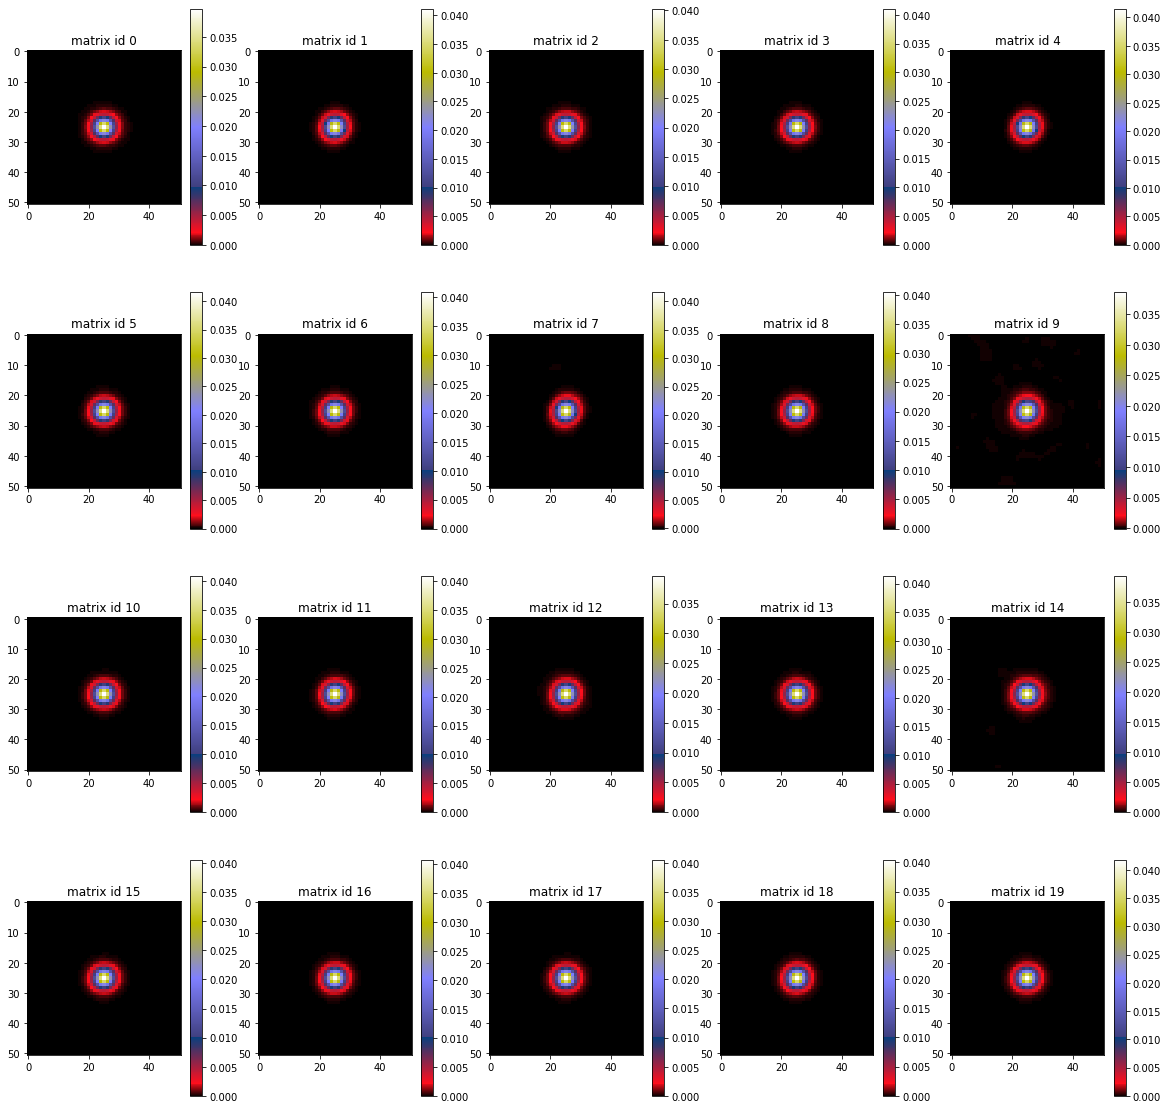

In [23]:
mccd.utils.plot_imgs(aziz_val_data[1].data['PSF_VIGNET_LIST'][:20,:,:], cmap = 'gist_stern', figsize=(20,20))



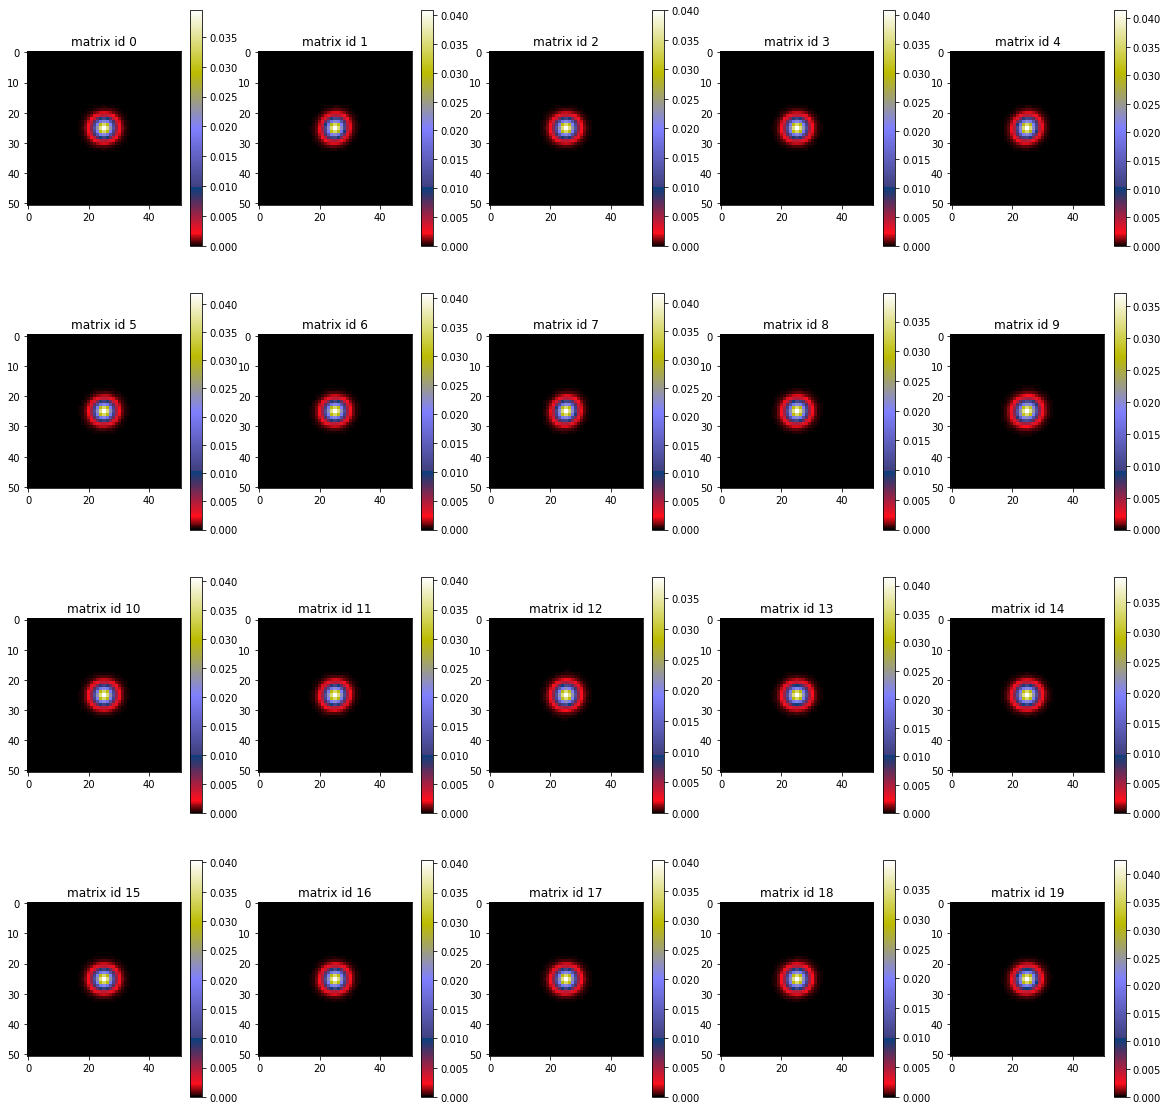

In [24]:

mccd.utils.plot_imgs(aziz_val_data[1].data['VIGNET_LIST'][:20,:,:], cmap = 'gist_stern', figsize=(20,20))




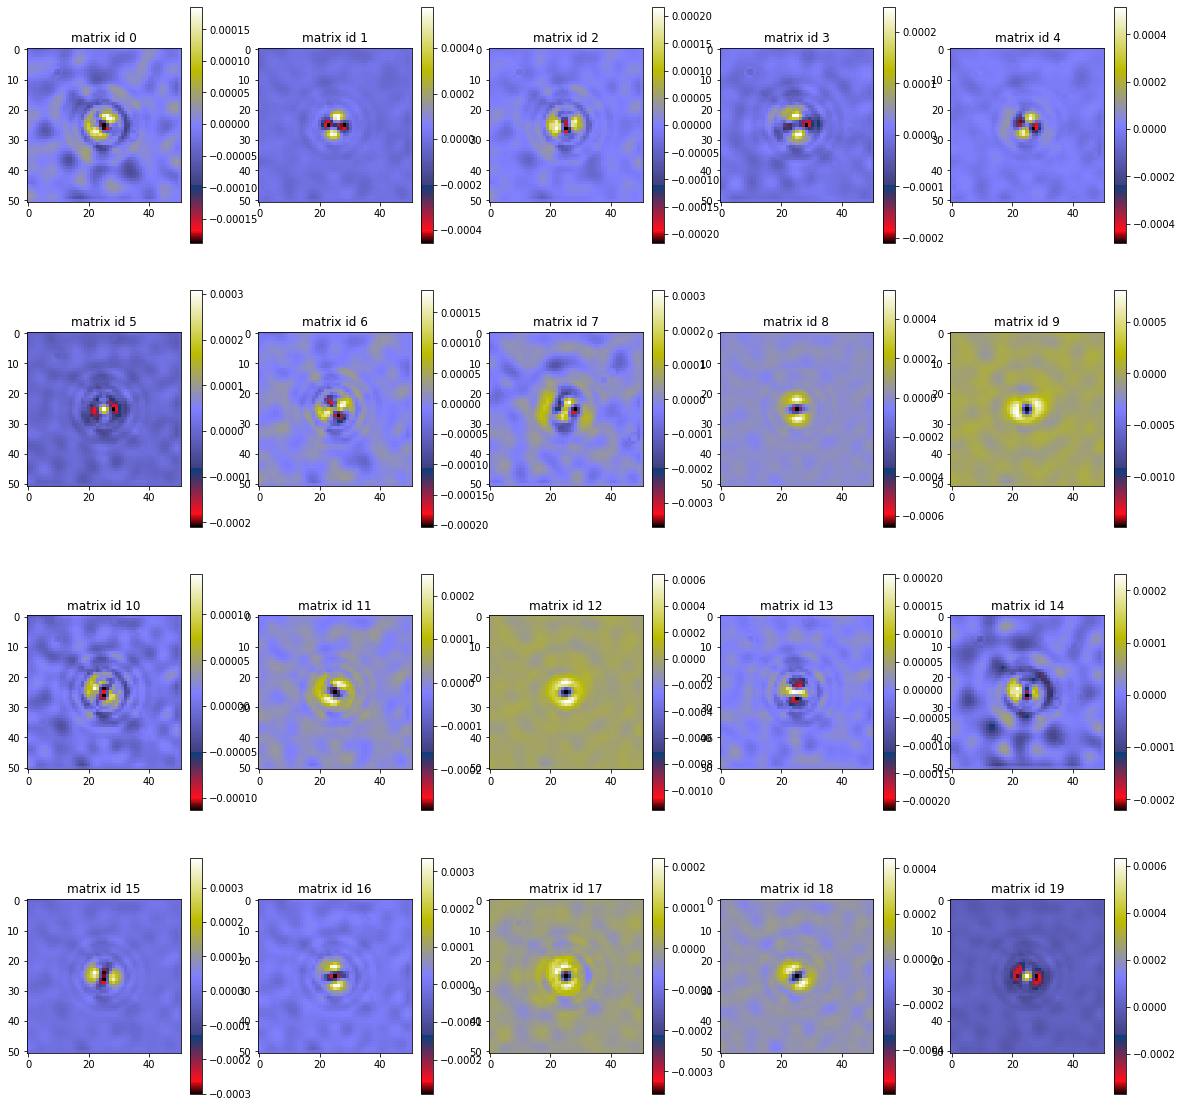

In [25]:

mccd.utils.plot_imgs(
    aziz_val_data[1].data['VIGNET_LIST'][:20,:,:] - aziz_val_data[1].data['PSF_VIGNET_LIST'][:20,:,:],
    cmap = 'gist_stern',
    figsize=(20,20)
)



## Check out Aziz's local eigenPSFs


In [27]:

eigen_psf_aziz_path = '/n05data/ayed/outputs/eigenpsfs/'

aziz_eigen_data = fits.open(eigen_psf_aziz_path + 'local_eigenpsfs.fits')
aziz_eigen_data[1].columns


ColDefs(
    name = 'VIGNETS_NOISELESS'; format = '2601D'; dim = '(51, 51)'
)

In [30]:

reduced_eigen = aziz_eigen_data[1].data['VIGNETS_NOISELESS'][:1000,:,:]


In [32]:
multiple = np.array([np.sum(im)>0 for im in reduced_eigen]) * 2. - 1.
reduced_eigen *= multiple.reshape((-1, 1, 1))


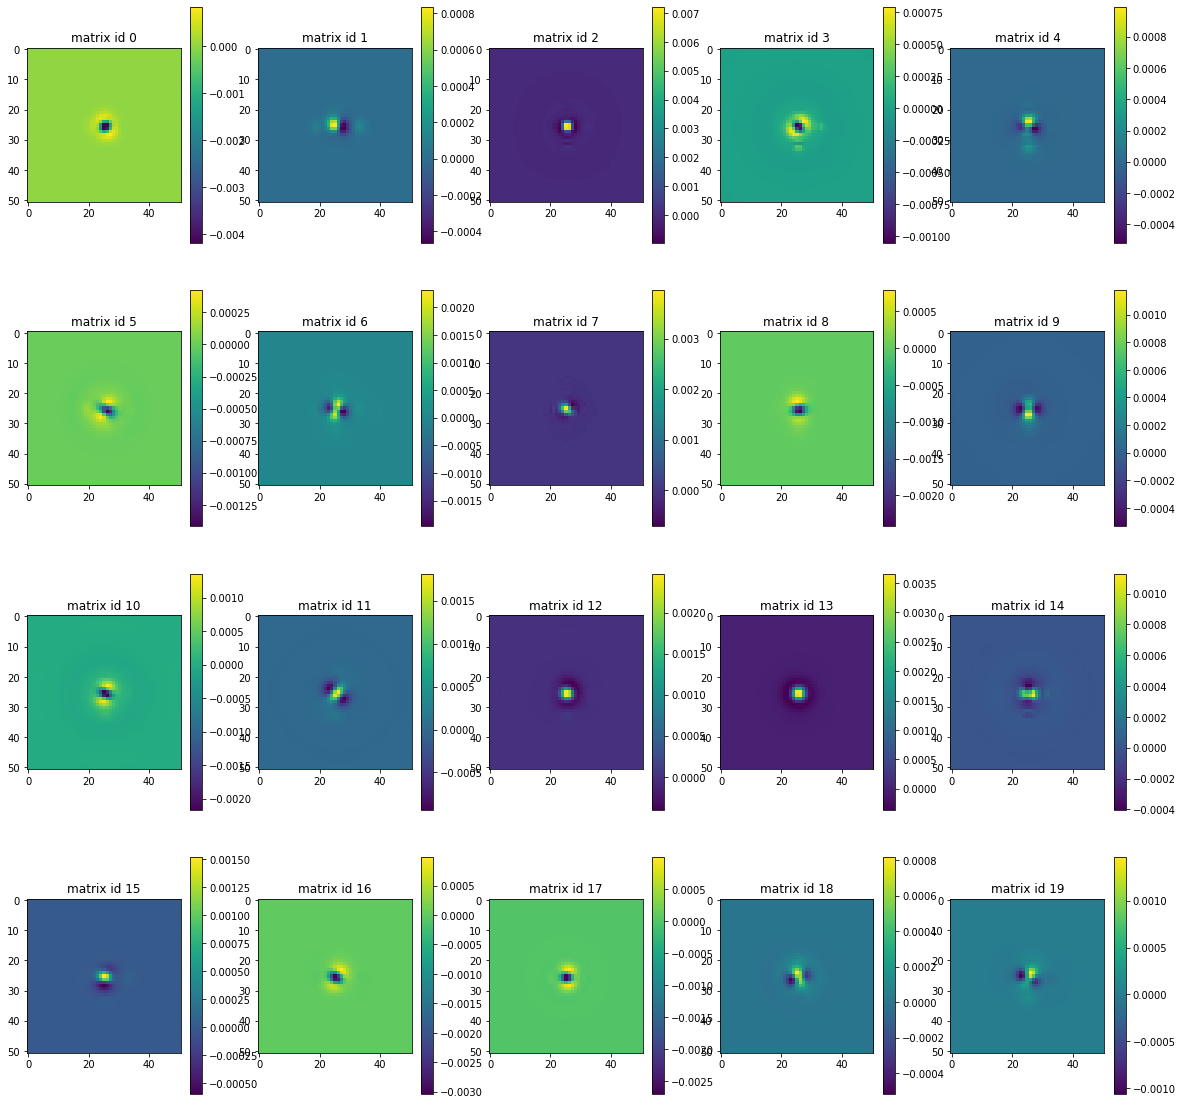

In [34]:
mccd.utils.plot_imgs(
    reduced_eigen[:20,:,:],
    cmap = 'viridis',
    figsize=(20,20)
)
